# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt
import itertools
from IPython.display import display


pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.precision', 3)
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 38)

In [20]:
from sklearn.metrics import classification_report,  confusion_matrix, accuracy_score, f1_score,  precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, roc_auc_score, f1_score


# Stats and Feature Engineering
HTGS: Home Total Goals Scored   
ATGS: Away Total Goals Scored  
HTGC: Home Total Goals Conceded    
ATGC: Away Total Goals Conced  
HTS: Home Total Shots  
ATS: Away Total Shots  
HTSC: Home total shots conceded   
ATSC: Away total shots conceded   
HTTS: Home Total Target Shots  
ATTS: Away Total Target Shots  
HTTSC: Home total target shots conceded  
ATTSC: Away total target shots conceded   
HTF: Home Total Fouls  
ATF: Away Total Fouls  
HTC: Home Total Corners  
ATC: Away Total Corners  
HTY: Home Total Yellows  
ATY: Away Total Yellows  
HTR: Home Total Reds  
ATR: Home Total Reds  
HTP: Home Team Points   
ATP: Away Team Points   
HTFormPts: Home points in the last 5 games   
ATFormPts:  Aeay points in the last 5 games  
MW: Matchweek   

In [4]:
folder='Clean Data\Clean_data.csv'
stats_df = pd.read_csv(folder, index_col=[0])

In [5]:
stats_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTGS,HTGC,HTS,HTSC,HTTS,HTTSC,HTF,HTC,HTY,HTR,HTP,HTFormPts,ATGS,ATGC,ATS,ATSC,ATTS,ATTSC,ATF,ATC,ATY,ATR,ATP,ATFormPts,MW,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,AVG Home Odds,IWH,GBH,LBH,WHH,B365H,BWH,SJH,VCH,BSH,PSH
0,09/09/00,Coventry,Leeds,0,0,D,Paul Durkin,9,11,1,5,15,14,6,6,2,2,0,0,5,7,35,55,19,24,58,24,12,1,6,6,5,3,39,35,20,17,59,23,3,0,6,6,5,L,D,W,L,W,W,L,W,M,M,3.062,2.70,3.05,3.50,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1,09/09/00,Ipswich,Aston Villa,1,2,A,Andy D'Urso,15,5,5,2,9,13,5,3,1,3,0,0,4,6,49,56,21,21,46,17,3,0,4,4,2,4,26,27,16,18,32,18,5,0,2,2,5,L,W,W,L,D,D,L,D,M,M,2.600,2.50,2.65,2.50,2.75,NaN,NaN,NaN,NaN,NaN,NaN
2,09/09/00,Leicester,Southampton,1,0,H,Mike Dean,17,9,6,5,6,9,10,6,0,0,0,0,3,1,34,37,20,22,50,24,8,0,8,8,7,8,50,30,20,19,54,35,9,0,3,3,5,W,D,D,D,W,L,D,D,M,M,1.730,1.75,1.71,1.80,1.66,NaN,NaN,NaN,NaN,NaN,NaN
3,09/09/00,Liverpool,Man City,3,2,H,Graham Barber,14,9,8,7,17,17,9,4,3,4,0,0,7,6,43,43,25,25,47,26,5,2,7,7,7,9,45,41,22,27,67,22,9,0,6,6,5,W,W,D,L,L,W,W,L,M,M,1.353,1.35,1.30,1.40,1.36,NaN,NaN,NaN,NaN,NaN,NaN
4,09/09/00,Man United,Sunderland,3,0,H,Neale Barry,15,5,7,1,18,14,4,4,1,3,0,0,11,3,63,45,32,26,35,23,4,0,8,8,4,6,43,59,16,31,55,15,9,0,4,4,5,W,D,D,L,D,L,W,W,M,M,1.300,1.35,1.25,1.35,1.25,NaN,NaN,NaN,NaN,NaN,NaN


## Differences 

HTGD: Home Total Goals Difference  
HTSD: Home Total Shots Difference  
HTTSD: Home Total Target Shots Difference  
ATGD: Away Total Goals Difference    
ATSD: Away Total Shots Difference  
ATTSD: Away Total Target Shots Difference  
FPD: Form Points Difference


In [6]:
stats_df['HTGD'] = stats_df['HTGS'] - stats_df['HTGC']
stats_df['ATGD'] = stats_df['ATGS'] - stats_df['ATGC']
stats_df['FPD'] = stats_df['HTFormPts'] - stats_df['ATFormPts']

In [7]:
stats_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTGS,HTGC,HTS,HTSC,HTTS,HTTSC,HTF,HTC,HTY,HTR,HTP,HTFormPts,ATGS,ATGC,ATS,ATSC,ATTS,ATTSC,ATF,ATC,ATY,ATR,ATP,ATFormPts,MW,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,AVG Home Odds,IWH,GBH,LBH,WHH,B365H,BWH,SJH,VCH,BSH,PSH,HTGD,ATGD,FPD
0,09/09/00,Coventry,Leeds,0,0,D,Paul Durkin,9,11,1,5,15,14,6,6,2,2,0,0,5,7,35,55,19,24,58,24,12,1,6,6,5,3,39,35,20,17,59,23,3,0,6,6,5,L,D,W,L,W,W,L,W,M,M,3.062,2.70,3.05,3.50,3.00,NaN,NaN,NaN,NaN,NaN,NaN,-2,2,0
1,09/09/00,Ipswich,Aston Villa,1,2,A,Andy D'Urso,15,5,5,2,9,13,5,3,1,3,0,0,4,6,49,56,21,21,46,17,3,0,4,4,2,4,26,27,16,18,32,18,5,0,2,2,5,L,W,W,L,D,D,L,D,M,M,2.600,2.50,2.65,2.50,2.75,NaN,NaN,NaN,NaN,NaN,NaN,-2,-2,2
2,09/09/00,Leicester,Southampton,1,0,H,Mike Dean,17,9,6,5,6,9,10,6,0,0,0,0,3,1,34,37,20,22,50,24,8,0,8,8,7,8,50,30,20,19,54,35,9,0,3,3,5,W,D,D,D,W,L,D,D,M,M,1.730,1.75,1.71,1.80,1.66,NaN,NaN,NaN,NaN,NaN,NaN,2,-1,5
3,09/09/00,Liverpool,Man City,3,2,H,Graham Barber,14,9,8,7,17,17,9,4,3,4,0,0,7,6,43,43,25,25,47,26,5,2,7,7,7,9,45,41,22,27,67,22,9,0,6,6,5,W,W,D,L,L,W,W,L,M,M,1.353,1.35,1.30,1.40,1.36,NaN,NaN,NaN,NaN,NaN,NaN,1,-2,1
4,09/09/00,Man United,Sunderland,3,0,H,Neale Barry,15,5,7,1,18,14,4,4,1,3,0,0,11,3,63,45,32,26,35,23,4,0,8,8,4,6,43,59,16,31,55,15,9,0,4,4,5,W,D,D,L,D,L,W,W,M,M,1.300,1.35,1.25,1.35,1.25,NaN,NaN,NaN,NaN,NaN,NaN,8,-2,4


## Feature Selection

In [31]:
cols_req = ['FTR','HTGD','HTS','HTTS', 'HTF', 'HTC', 'HTY', 'HTR', 'ATGD','ATS','ATTS', 'ATF', 'ATC', 'ATY', 'ATR', 'HTP', 'ATP', 'MW', 'FPD','HM1', 'HM2', 'HM3','AM1', 'AM2', 'AM3']
final_df = stats_df[cols_req]

In [32]:
cols = ['HTGD', 'HTS','HTTS','HTF', 'HTC', 'HTY', 'HTR', 'ATGD','ATS','ATTS', 'ATF', 'ATC', 'ATY', 'ATR', 'HTP', 'ATP']
final_df.MW = final_df.MW.astype(float)

final_df[cols] = final_df[cols].divide(final_df.MW, axis=0)
final_df['HW'] = final_df.FTR.apply(lambda string: 1 if string == 'H' else 0)

In [33]:
final_df.tail()

,FTR,HTGD,HTS,HTTS,HTF,HTC,HTY,HTR,ATGD,ATS,ATTS,ATF,ATC,ATY,ATR,HTP,ATP,MW,FPD,HM1,HM2,HM3,AM1,AM2,AM3,HW
7475,H,0.079,10.684,3.789,10.605,4.553,1.711,0.026,0.026,13.105,4.816,9.816,5.079,1.868,0.053,1.184,1.526,38.0,4,L,D,W,L,W,D,1
7476,H,0.000,11.132,4.289,9.105,4.789,1.421,0.026,-0.553,12.500,4.421,10.447,6.079,1.632,0.053,1.289,1.053,38.0,6,D,W,W,L,L,L,1
7477,H,1.737,18.447,6.526,9.395,7.368,1.289,0.026,-0.079,10.395,3.447,9.526,4.342,1.553,0.053,2.342,1.342,38.0,11,W,W,D,D,L,D,1
7478,H,1.895,18.184,6.553,8.289,8.000,1.105,0.026,-0.026,11.842,4.211,10.263,5.132,2.000,0.053,2.368,1.184,38.0,5,D,W,W,D,D,L,1
7479,A,-1.474,9.605,2.868,9.026,4.263,1.368,0.053,0.632,12.421,4.868,9.974,5.079,1.737,0.026,0.579,1.789,38.0,-10,D,L,L,W,W,D,0


# Split test and Train/Dev

In [34]:
#Train 2000/01 - 2015/16: 16 seasons
# Dev has 2016/17 - 2018-19: 3 seasons
#Test has 2019/20 - 21/22 for a total for 3 seasons
weeks_skip = 4
skipped_games = weeks_skip*10
games_per_season = 380 - skipped_games
train_cutoff = 16 * games_per_season
dev_cutoff = 19 * games_per_season

train_df = final_df[:train_cutoff]
dev_df = final_df[train_cutoff:dev_cutoff]
test_df = final_df[dev_cutoff:] 


print(skipped_games)
print(games_per_season)
print(train_cutoff, dev_cutoff)

40
340
5440 6460


## Confustion Matrix

<AxesSubplot: >

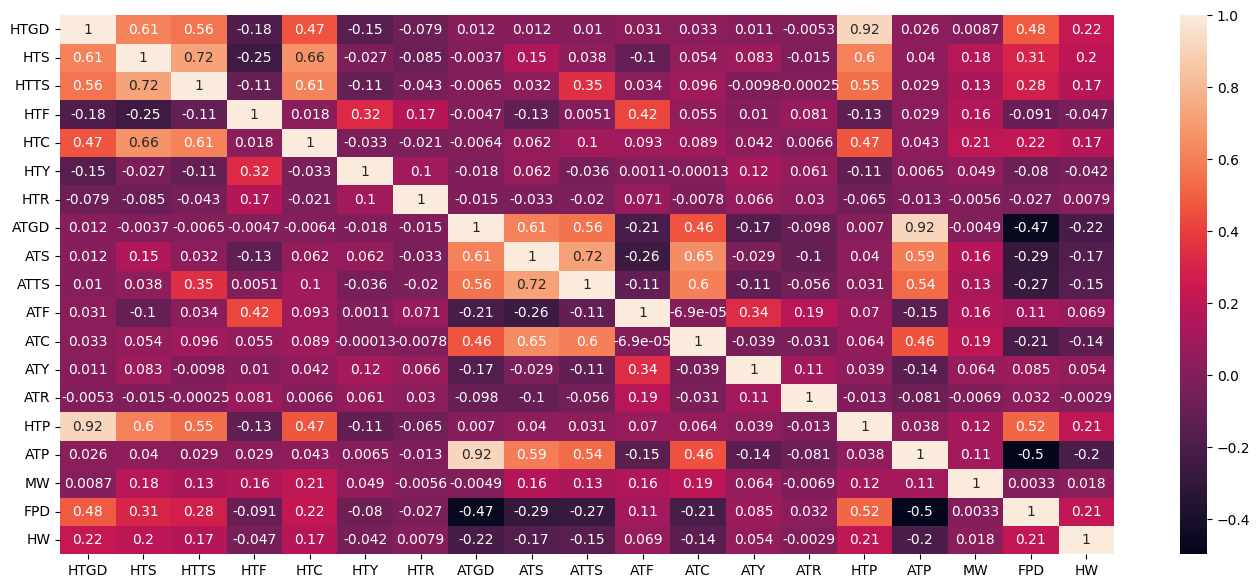

In [35]:
conf = train_df.drop(columns=['FTR','HM1', 'HM2', 'HM3','AM1', 'AM2', 'AM3'])


plt.figure(figsize=(17,7)) 
sns.heatmap(conf.corr(), annot= True)

In [36]:
conf.corr()['HW'][abs(conf.corr()['HW']) < 0.1]

HTF   -0.047
HTY   -0.042
HTR    0.008
ATF    0.069
ATY    0.054
ATR   -0.003
MW     0.018
Name: HW, dtype: float64

# Basline

## Train Home Win percentage

In [37]:
train_df['HW'].value_counts(normalize=True)[1]

0.4672794117647059

## Dev Home Win Percentage

In [38]:
dev_df['HW'].value_counts(normalize=True)[1]

0.4823529411764706

# Model Building

In [39]:
from sklearn.preprocessing import OneHotEncoder
cols = ['HM1', 'HM2', 'HM3','AM1', 'AM2', 'AM3']

dummy = np.array([['W', 'W', 'W', 'W', 'W', 'W'],
                  ['L', 'L', 'L', 'L', 'L', 'L'],
                  ['D', 'D', 'D', 'D', 'D', 'D']], dtype=object)

ohe = OneHotEncoder()
ohe.fit(dummy)

t = ohe.transform(train_df[cols]).toarray()
d= ohe.transform(dev_df[cols]).toarray()
ts = ohe.transform(test_df[cols]).toarray()

# Win: 0,0,1
# Draw 1,0,0
# Loss: 0,1,0

c:\Users\jacob\.virtualenvs\soccer_betting-JkNaC4S5\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
c:\Users\jacob\.virtualenvs\soccer_betting-JkNaC4S5\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
c:\Users\jacob\.virtualenvs\soccer_betting-JkNaC4S5\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [40]:
from sklearn.preprocessing import StandardScaler

no_corr = ['HTY','HTR','ATY','ATR']

train_features = train_df.drop(columns=['FTR','HW']+no_corr).values[:,:-6]
train_features = np.append(train_features, t,axis=1)
train_labels = train_df['HW'].values

dev_features = dev_df.drop(columns=['FTR','HW']+no_corr).values[:,:-6]
dev_features = np.append(dev_features, d,axis=1)
dev_labels = dev_df['HW'].values

test_features = test_df.drop(columns=['FTR','HW']+no_corr).values[:,:-6]
test_features = np.append(test_features, d,axis=1)
test_labels = test_df['HW'].values




scale = False

if scale:
  train_scale = StandardScaler()
  train_features = train_scale.fit_transform(train_features)

  dev_scale = StandardScaler()
  dev_features = dev_scale.fit_transform(dev_features)


print(train_features.shape)
print(dev_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(dev_labels.shape)
print(test_labels.shape)

(5440, 32)
(1020, 32)
(1020, 32)
(5440,)
(1020,)
(1020,)


In [43]:
models = {'KNN': KNeighborsClassifier(n_jobs=-1),
          'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
          'XGBoost' : XGBClassifier(n_jobs=-1, random_state=42),
          'Naive Bayes Gaussian': GaussianNB(),
          'SVC': SVC(random_state=42, probability=True)
          }

results = {}
dev_preds_dic ={}
test_preds_dic ={}

for model_name, model in models.items():
  model.fit(train_features, train_labels)

  dev_preds = model.predict(dev_features)
  dev_probs = model.predict_proba(dev_features)
  dev_preds_dic[model_name] = dev_preds

  test_preds = model.predict(test_features)
  test_probs = model.predict_proba(test_features)
  test_preds_dic[model_name] = test_preds


  dev_precision = precision_score(dev_labels, dev_preds)
  dev_recall = recall_score(dev_labels, dev_preds)
  dev_roc_auc = roc_auc_score(dev_labels, dev_probs[:,1])
  dev_f1 = f1_score(dev_labels, dev_preds)


  results[model_name] = [model.score(train_features, train_labels), model.score(dev_features, dev_labels), dev_precision, dev_recall, dev_roc_auc, dev_f1]

## Analyze Results

### Accuracy Precision, Recall, F1 and AUC Scores

In [44]:
def display_scores(results):
  results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Train Accuracy Score','Dev Accuracy Score','Dev Precision Score','Dev Recall Score','Dev Roc Auc','Dev F1 Score'])
  return results_df
results = display_scores(results)
results

,Train Accuracy Score,Dev Accuracy Score,Dev Precision Score,Dev Recall Score,Dev Roc Auc,Dev F1 Score
KNN,0.735,0.626,0.618,0.591,0.646,0.604
RandomForest,1.000,0.684,0.691,0.624,0.729,0.656
XGBoost,0.992,0.664,0.652,0.650,0.704,0.651
Naive Bayes Gaussian,0.646,0.657,0.647,0.636,0.731,0.641
SVC,0.658,0.677,0.703,0.573,0.733,0.632


### Confusion Matrix

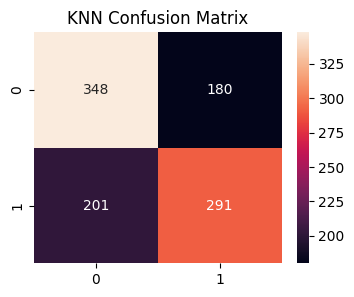

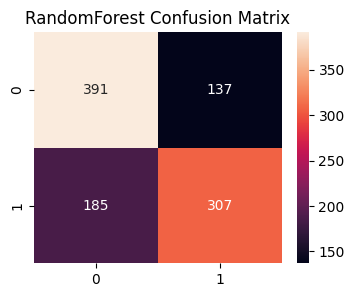

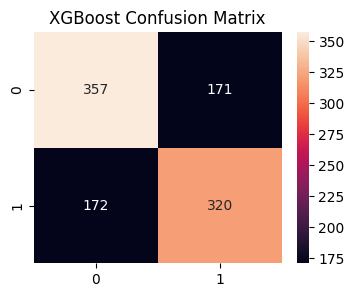

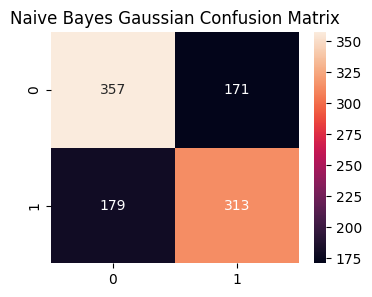

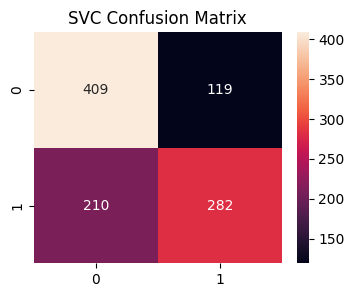

In [45]:
for model in dev_preds_dic:
  cm = confusion_matrix(dev_labels, dev_preds_dic[model])
  plt.figure(figsize=(4,3))
  plt.title(f'{model} Confusion Matrix')
  sns.heatmap(cm, annot=True,fmt='d')
  plt.show()

#TN FP
#FN TP

# x axis is model prediction
# y axis is actual 

# Evaluate Dev + Test Performance

In [46]:
odds_df = stats_df[['Date', 'HomeTeam', 'AwayTeam', 'WHH', 'IWH', 'LBH', 'GBH', 'AVG Home Odds', 'B365H', 'BWH', 'SJH', 'VCH', 'BSH', 'PSH']]

dev_odds_df = odds_df[train_cutoff:dev_cutoff].dropna('columns')
test_odds_df = odds_df[dev_cutoff:].dropna('columns')
devtest_odds_df = odds_df[train_cutoff:].dropna('columns')

C:\Users\jacob\AppData\Local\Temp\ipykernel_44632\1337755885.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dev_odds_df = odds_df[train_cutoff:dev_cutoff].dropna('columns')
C:\Users\jacob\AppData\Local\Temp\ipykernel_44632\1337755885.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  test_odds_df = odds_df[dev_cutoff:].dropna('columns')
C:\Users\jacob\AppData\Local\Temp\ipykernel_44632\1337755885.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  devtest_odds_df = odds_df[train_cutoff:].dropna('columns')


## Evaluate Home win Strategy

In [47]:
def pl_plot(pl_df, size):

    pl_df[['Baseline PL','KNN PL', 'RandomForest PL', 'XGBoost PL', 'Naive Bayes Gaussian PL', 'SVC PL']].plot( alpha = 0.7, figsize=size)
    plt.title('Baseline vs Classifiers')
    plt.xlabel('# of Matches')
    plt.ylabel('Money($)')
    plt.axvline(x=len(pl_df)/2, label='Dev Cutoff')
    plt.legend()  

    plt.show()

def devtest_pl(pl_df):

    devtest_pl = pl_df[['Baseline PL','KNN PL', 'RandomForest PL', 'XGBoost PL', 'Naive Bayes Gaussian PL', 'SVC PL']].iloc[-1,:].sort_values(ascending=False).rename('DevTest PL')
    dev_pl = pl_df[['Baseline PL','KNN PL', 'RandomForest PL', 'XGBoost PL', 'Naive Bayes Gaussian PL', 'SVC PL']].iloc[int(len(pl_df)/2),:].sort_values(ascending=False).rename('Dev PL')

    return pd.DataFrame(dev_pl).join(devtest_pl)


In [48]:
from utils import home_win_pl, ev_pl

odds_line = 'AVG Home Odds'
devtest_labels = np.append(dev_labels,test_labels)
devtest_features = np.append(dev_features, test_features, axis=0)


pl_df_home = home_win_pl(odds_line, devtest_labels, devtest_features, devtest_odds_df, models)
devtest_pl(pl_df_home)

,Dev PL,DevTest PL
XGBoost PL,7672.095,5378.429
Baseline PL,5994.500,-493.833
RandomForest PL,5237.738,4453.238
KNN PL,5046.190,1587.524
SVC PL,3119.119,1258.786
Naive Bayes Gaussian PL,1771.167,-396.167


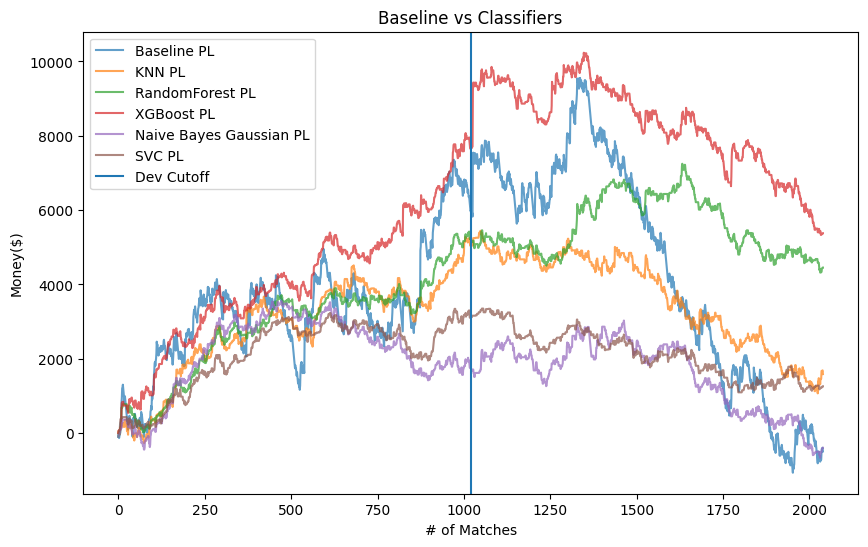

In [49]:
pl_plot(pl_df_home, (10,6))

## Evaluate with Positive EV Betting with Dev and Test Data

In [50]:
pl_df_ev = ev_pl(odds_line, devtest_labels, devtest_features, devtest_odds_df, models)
devtest_pl(pl_df_ev)

,Dev PL,DevTest PL
RandomForest PL,8120.548,4967.381
XGBoost PL,7894.143,5287.976
Baseline PL,5994.500,-493.833
SVC PL,5824.357,2845.524
Naive Bayes Gaussian PL,4297.167,1882.667
KNN PL,3954.548,-1965.786


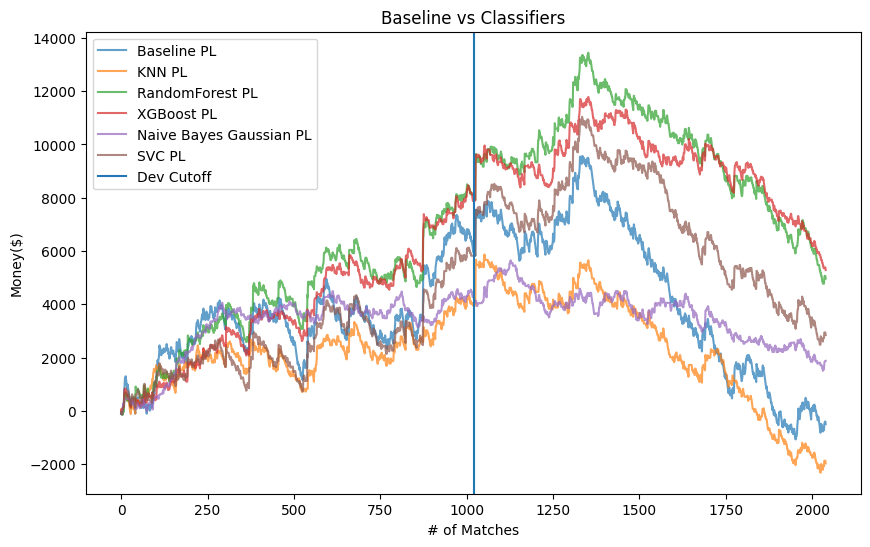

In [51]:
pl_plot(pl_df_ev, (10,6))

## Save Model

In [ ]:
# import joblib
# model = 'XGBoost'

# joblib.dump(models[model], 'saved_models/final_xgb_3.pkl')

# Hyperparamter Tuning ROC AUC score

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
xgb = XGBClassifier(random_state = 42)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 3, verbose = True, n_jobs = -1, scoring='roc_auc')
best_clf_xgb_rnd = clf_xgb_rnd.fit(train_features, train_labels)
clf_performance(best_clf_xgb_rnd,'XGB')

In [ ]:

rf = RandomForestClassifier(random_state = 42)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose = True, n_jobs = -1, scoring='roc_auc')
best_clf_rf_rnd = clf_rf_rnd.fit(train_features, train_labels)
clf_performance(best_clf_rf_rnd,'Random Forest')

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1,  scoring='roc_auc')
best_clf_knn = clf_knn.fit(train_features, train_labels)
clf_performance(best_clf_knn,'KNN')

In [ ]:
svc = SVC(probability = True, random_state=42)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='roc_auc')
best_clf_svc = clf_svc.fit(train_features, train_labels)
clf_performance(best_clf_svc,'SVC')

In [ ]:
nbg = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

clf_nbg = GridSearchCV(estimator=nbg, param_grid=param_grid, verbose=1, cv=3, n_jobs=-1)
best_clf_nbg = clf_nbg.fit(train_features, train_labels)
clf_performance(best_clf_nbg,'NBG')

In [ ]:
models_tuned = {'KNN': best_clf_knn.best_estimator_,
          'RandomForest': best_clf_rf_rnd.best_estimator_,
          'XGBoost' : best_clf_xgb_rnd.best_estimator_,
          'Naive Bayes Gaussian': best_clf_nbg.best_estimator_,
          'SVC': best_clf_svc.best_estimator_
          }


results = {}
dev_preds_dic ={}
test_preds_dic ={}

for model_name, model in models_tuned.items():
  
  dev_preds = model.predict(dev_features)
  dev_probs = model.predict_proba(dev_features)
  dev_preds_dic[model_name] = dev_preds

  test_preds = model.predict(test_features)
  test_probs = model.predict_proba(test_features)
  test_preds_dic[model_name] = test_preds


  dev_precision = precision_score(dev_labels, dev_preds)
  dev_recall = recall_score(dev_labels, dev_preds)
  dev_roc_auc = roc_auc_score(dev_labels, dev_probs[:,1])
  dev_f1 = f1_score(dev_labels, dev_preds)


  results[model_name] = [model.score(train_features, train_labels), model.score(dev_features, dev_labels), dev_precision, dev_recall, dev_roc_auc, dev_f1]

In [ ]:
display_scores(results)

In [ ]:
pl_df_tune = home_win_pl(odds_line, devtest_labels, devtest_features, devtest_odds_df, models_tuned)
devtest_pl(pl_df_tune)

In [ ]:
pl_plot(pl_df_tune, (10,6))